# Assignment 4: Lasso, Tree Regression, and Cross Validation 
# FI 8090
## Group 2: Caroline MacMillan, Chris Lee, and Jonghwa Baek

In [1]:
#Importing all the packages used in Assignment 4
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import graphviz
import operator

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV

C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Part 1

Description of College data set:

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

A data frame with 777 observations on the following 18 variables.
- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received(projection)
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

## LASSO 
Predict the number of applications received $\color{red}{\text{Apps}}$ using all other variables in the $\color{red}{\text{College}}$ data set using $\textbf{LASSO}$ model for variable selection:  


In [2]:
college = pd.read_csv('College.csv') #Importing the College Data set.
college.head() #Taking a look at the imported College Data set.

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
college.shape #Checking the shape - Rows and Columns of the Data

(777, 19)

In [4]:
college_dummied = pd.get_dummies(data = college, columns = ['Private']) #Dummying the categorical feature 'Private'

In [5]:
college_dummied.head() #Taking a look at the new data with the Dummy Variables.

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


In [6]:
college_dummied.shape #Checking the shape - Rows and Columns of the Data with Dummies

(777, 20)

#### a.	Split the data set randomly into training and test data set. 

In [7]:
X = college_dummied[college_dummied.columns[2:]].drop(['Private_No'], axis = 1) #Defining the independent variables - Features
y = college_dummied['Apps'] #Defining the response - dependent variable.
y.head()

0    1660
1    2186
2    1428
3     417
4     193
Name: Apps, dtype: int64

In [8]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3) #Splitting the data into training and testing with a 0.7/0.3 split.

In [9]:
print('X_train:', X_train.shape) #Checking the shape of the split data.
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (543, 17)
y_train: (543,)
X_test: (234, 17)
y_test: (234,)


#### b.	Fit Lasso model using on the training data set.

In [10]:
lassob = Lasso(alpha = 1, normalize = True) #Fitting a Lasso model on the training data set.
lassob.fit(X_train, y_train)      

Lasso(alpha=1, normalize=True)

In [11]:
predb = lassob.predict(X_test) #Applying the model on the test data set.
print(pd.Series(lassob.coef_, index = X.columns)) 
print("MSE is", mean_squared_error(y_test, predb)) #Calculating the MSE of this Model

Accept           1.536954
Enroll          -0.250222
Top10perc       32.730354
Top25perc       -2.011395
F.Undergrad     -0.000000
P.Undergrad      0.000000
Outstate        -0.043610
Room.Board       0.080326
Books            0.000000
Personal         0.000000
PhD             -3.283692
Terminal        -5.262049
S.F.Ratio        0.000000
perc.alumni     -1.725958
Expend           0.053409
Grad.Rate        4.719872
Private_Yes   -307.203089
dtype: float64
MSE is 1242171.376156464


#### c. Perform cross-validation on the training data set to choose the best lambda.  

In [12]:
alphas = 10**np.linspace(10,-2,100)*0.3

In [13]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True) #Using CV Lasso Regression to determine the best alpha to use.
lassocv.fit(X_train, y_train) #Fitting the model.
print(lassocv.alpha_) #Displaying the lambda.
lassoc = Lasso(alpha = lassocv.alpha_, normalize = True) #Fitting Lasso model with the best lamda.
lassoc.fit(X_train, y_train)

1.8407721820239487


Lasso(alpha=1.8407721820239487, normalize=True)

#### d.	Estimate the predicted values using the best lambda obtained in part (c) on the test data and compute test MSE. 

In [14]:
predd = lassoc.predict(X_test) #Applying the lasso model with best alpha, on the test data set. 
print(pd.Series(lassoc.coef_, index = X.columns)) 
mse1d = mean_squared_error(y_test, predd)
print("MSE is", mean_squared_error(y_test, predd)) #Calculating the MSE for this model.

Accept           1.456184
Enroll          -0.000000
Top10perc       26.640296
Top25perc       -0.000000
F.Undergrad     -0.000000
P.Undergrad      0.000000
Outstate        -0.014236
Room.Board       0.038932
Books            0.000000
Personal         0.000000
PhD             -1.121905
Terminal        -4.100051
S.F.Ratio        0.000000
perc.alumni     -0.871759
Expend           0.045355
Grad.Rate        2.782182
Private_Yes   -193.963771
dtype: float64
MSE is 1297628.4623670129


#### e.	Compare the Lasso predicted test MSE (with the best lambda) with the null model (lambda=infinity) test MSE and least square regression model (lambda=0) test MSE. What do you conclude?  

In [15]:
lasso_null = Lasso(alpha = 10**100, normalize = True) #Creating and Fitting the Null Model
lasso_null.fit(X_train, y_train)             
prede = lasso_null.predict(X_test) #Applying the null model on the test data set.
print(pd.Series(lasso_null.coef_, index = X.columns)) 
nullmse = mean_squared_error(y_test, prede)
print("MSE is", mean_squared_error(y_test, prede)) #Calculating MSE

Accept         0.0
Enroll         0.0
Top10perc      0.0
Top25perc      0.0
F.Undergrad    0.0
P.Undergrad    0.0
Outstate       0.0
Room.Board     0.0
Books          0.0
Personal       0.0
PhD            0.0
Terminal       0.0
S.F.Ratio      0.0
perc.alumni   -0.0
Expend         0.0
Grad.Rate      0.0
Private_Yes   -0.0
dtype: float64
MSE is 13233566.273857038


In [16]:
lasso_lr = Lasso(alpha = 0, normalize = True) #Creating and Fitting on the Least Squares Regression Model, Alpha = 0.
lasso_lr.fit(X_train, y_train)               
prede2 = lasso_lr.predict(X_test) #Applying the Least Squares Regression Model on the test data set.
print(pd.Series(lasso_lr.coef_, index = X.columns)) 
lsrmse = mean_squared_error(y_test, prede2)
print("MSE is", mean_squared_error(y_test, prede2)) #Calculating the MSE.

Accept           1.673308
Enroll          -0.873325
Top10perc       52.326367
Top25perc      -16.150527
F.Undergrad      0.043530
P.Undergrad      0.000657
Outstate        -0.081145
Room.Board       0.124176
Books            0.028431
Personal         0.007753
PhD             -5.791057
Terminal        -5.312529
S.F.Ratio        3.164755
perc.alumni     -1.673190
Expend           0.059182
Grad.Rate        7.957020
Private_Yes   -436.966716
dtype: float64
MSE is 1203882.3457257512


C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279825137.90153825, tolerance: 852706.1331915286
  positive)


In [17]:
print('Lasso predicted test MSE (with the best lambda):', mse1d)
print('Null Model (lambda = infinity) test MSE:', nullmse)
print('Least Square Regression Model (lambda = 0) test MSE:', lsrmse)

Lasso predicted test MSE (with the best lambda): 1297628.4623670129
Null Model (lambda = infinity) test MSE: 13233566.273857038
Least Square Regression Model (lambda = 0) test MSE: 1203882.3457257512


#### Conclusion:
- With a very high lambda (infinity) value that is equivalent to null model, all coefficient estimates are equal to zero which resulted in a MSE value higher than the other two models.

- Least square regression model returned a lower MSE than the Null model, but it is still needed to compare with the MSE from the best lambda model.

- Lasso generally provides estimates that are different at each value of lambda. In our case, while testing on different splits, depending on the random split of the data, the Lasso Model with the best lambda, and the Lasso Model with lambda = 0, have different, but comparable, almost similar, test MSE values. However, in most cases, the Lasso model with the best lambda vs. a lambda of 0, the Lasso model with a lambda of 0 has the lowest MSE. In other words, the Lease Square Regression Model tends to have the lowest MSE in most cases in our problem.


#### f.	Now construct the Lasso model for the entire data set and obtain the Lasso coefficients using the best lambda obtained in part (c) and report the number of non-zero coefficient estimates.    

In [18]:
lassoc.fit(X, y) #Fitting the Lasso Model with the best lambda with the entire data set.

coef = pd.Series(lassoc.coef_, index = X.columns)
dfzero = pd.DataFrame(coef == 0, columns = ['Zero']) #Creating the Dataframe consisting of Binary Value of the coefficients.

print(coef)
print("MSE is", mean_squared_error(y, lassoc.predict(X))) #Calculating the MSE

Accept           1.392404
Enroll          -0.000000
Top10perc       26.829524
Top25perc       -0.000000
F.Undergrad      0.000000
P.Undergrad      0.000000
Outstate        -0.021844
Room.Board       0.063062
Books            0.000000
Personal         0.000000
PhD             -1.653485
Terminal        -1.474814
S.F.Ratio        0.000000
perc.alumni     -0.000000
Expend           0.055140
Grad.Rate        1.335669
Private_Yes   -315.869245
dtype: float64
MSE is 1168199.0030548845


In [19]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables.")
print('Lasso picked:', ', '.join(list(dfzero.index[dfzero['Zero'] != True])))
print('Lasso eliminated:', ', '.join(list(dfzero.index[dfzero['Zero']])))

Lasso picked 9 variables and eliminated the other 8 variables.
Lasso picked: Accept, Top10perc, Outstate, Room.Board, PhD, Terminal, Expend, Grad.Rate, Private_Yes
Lasso eliminated: Enroll, Top25perc, F.Undergrad, P.Undergrad, Books, Personal, S.F.Ratio, perc.alumni


#### g.	Now use the Lasso predictors obtained in part (f) to fit the Linear Regression Model and report the summary of the linear model.

In [20]:
eliminate = list(dfzero.index[dfzero['Zero']]) #Creating a list of the features that have been reduced to zero.

In [21]:
X1 = X.drop(eliminate, axis = 1) #Dropping the features that have been reduced to zero.
X1 = sm.add_constant(X1)
model = sm.OLS(y, X1).fit() #Creating and fitting a Linear Regression Model with the reduced features.
predictions = model.predict(X1)
model.summary() #Summary of the Linear Model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:50:48   Log-Likelihood:                -6513.5
No. Observations:                 777   AIC:                         1.305e+04
Df Residuals:                     767   BIC:                         1.309e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -563.4339    274.653     -2.051      0.041   -1102.596     -24.272
Accept          1.4000      0.019     72.089      0.000       1.362       1.438
Top10perc      32.0362      3.289      9.741      0.000      25.580      38.492
Outstate       -0.0807      0.019     -4.339      0.000      -0.117      -0.044
Room.Board      0.1961      0.048      4.118      0.000       0.103       0.290
PhD            -8.0899      4.675     -1.730      0.084     -17.267       1.087
Terminal       -5.9151      5.092     -1.162      0.246     -15.911       4.080
Expend          0.0793      0.011      6.953      0.000       0.057       0.102
Grad.Rate       7.3037      2.866      2.548      0.011       1.677      12.931
Private_Yes  -469.7013    133.921     -3.507      0.000    -732.597    -206.806
==============================================================================
Omnibus:                      555.957   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15645.701
Skew:                           2.851   Prob(JB):                         0.00
Kurtosis:                      24.231   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Part 2				

#### Regression Tree

Predict the number of applications received $\color{red}{\text{Apps}}$ using all other variables in the $\color{red}{\text{College}}$ data set based on a Regression Tree:  

Perform the following tasks: $\textbf{Use the training and test data set that you created in Part 1(a).}$


#### a.	Fit a Regression Tree (max depth =3) to the training data, with $\color{red}{\text{Apps}}$ as the response and the all other variables as predictors. Create a plot of the tree. Note how many terminal nodes the tree has.

In [22]:
regr_tree_college = DecisionTreeRegressor(max_depth = 3) #Creating and fitting a Regression Tree Model wth a max depth of 3.
regr_tree_college.fit(X_train, y_train)
export_graphviz(regr_tree_college, out_file = "college_tree.dot")

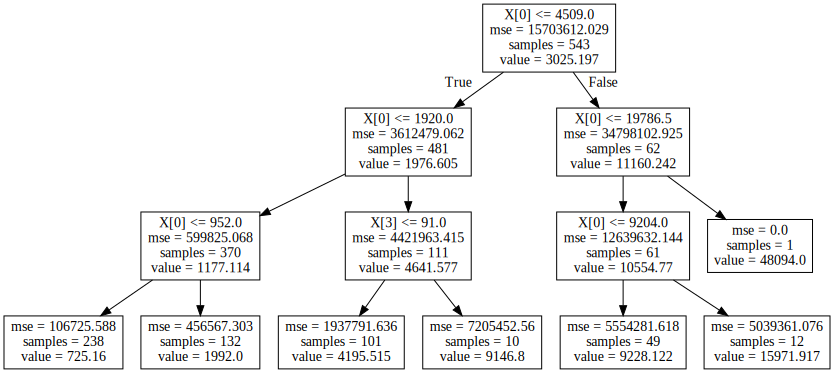

In [40]:
graphviz.Source(open('college_tree.dot').read())

This tree has 6 terminal nodes.

#### b.	Print: Training Accuracy and Test Accuracy, and  Test MSE.

In [24]:
y_pred = regr_tree_college.predict(X_test)
print('Training Accuracy: ',regr_tree_college.score(X_train, y_train))
print('Test Accuracy: ',regr_tree_college.score(X_test, y_test)) 
print("MSE:", mean_squared_error(y_test, y_pred))

Training Accuracy:  0.9195418960604136
Test Accuracy:  0.8339963262740235
MSE: 2195804.7653621435


#### c.	Now to find the optimal depth that will improve performance use cost complexity pruning to prune the decision tree. 	

In [25]:
path = DecisionTreeRegressor(random_state = 1).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#### d.	Based on part (c), produce a plot to observe total impurity versus effective alpha for training set. What do you observe? 

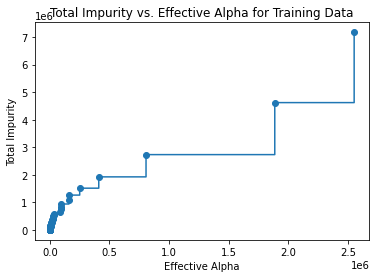

In [26]:
plt.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity")
plt.title("Total Impurity vs. Effective Alpha for Training Data")
plt.show()

It is evidenced that the total impurity of the leaves increases as the alpha increases with more of the tree pruned; in other words, we observe that as alpha is increasing, more of the tree is pruned which leads to an increase in the total impurity of its leaves.

#### e.	Construct plots to display Number of Nodes versus Alpha and Tree Depth versus Alpha. What do you observe? 

In [27]:
clf = DecisionTreeRegressor(random_state = 0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [28]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 8530343.50201896


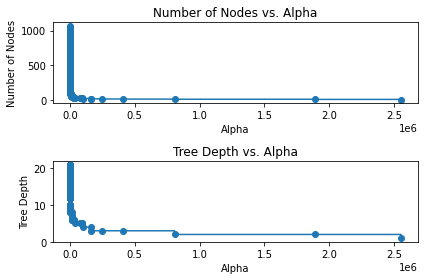

In [29]:
clfs = clfs[:-1] 
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = "steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs. Alpha")
ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = "steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree Depth")
ax[1].set_title("Tree Depth vs. Alpha")
fig.tight_layout()

It is observed that the # of nodes and depth have negative relations with alpha.
As alpha increases, the # of nodes and depth decreases.

#### f.	Construct plot to observe changes of training and test accuracy with respect to alpha.  What do you observe?  

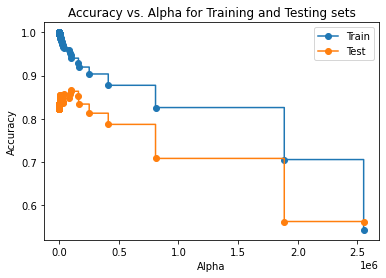

In [30]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha for Training and Testing sets")
plt.plot(ccp_alphas, train_scores, marker = 'o', label = "Train", drawstyle = "steps-post")
plt.plot(ccp_alphas, test_scores, marker = 'o', label = "Test", drawstyle = "steps-post")
plt.legend()
plt.show()

When alpha is zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and about relatively high testing accuracy. At every value of alpha, he training accuracy is always greater than testing accuracy. The optimal alpha seems to be around circling 0.5. Past that, as alpha increases, more of the nodes of the tree are pruned and the accuracies of the testing and training starts declining from there.

#### g.	Find which alpha corresponds to the highest test score? Find the depth of the tree corresponding to the best alpha and create the tree using that depth. Print the decision tree.  Compute the mean squared test error corresponding to the tree with best alpha.  What do you observe? 

In [32]:
index, value = max(enumerate(test_scores), key = operator.itemgetter(1))
print(index, 'is the index at which alpha corresponds to the highest test score.')
print(value, 'is the alpha that corresponds to the highest test score.')

514 is the index at which alpha corresponds to the highest test score.
0.8658884542688239 is the alpha that corresponds to the highest test score.


In [33]:
print(clfs[index].tree_.max_depth, 'is the depth of the tree corresponding to the best alpha.')

5 is the depth of the tree corresponding to the best alpha.


In [34]:
#Creating and fitting a Regression Tree Model wth a max depth corresponding to the best alpha.
regr_tree_college_best_alpha = DecisionTreeRegressor(max_depth = clfs[index].tree_.max_depth) 
regr_tree_college_best_alpha.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

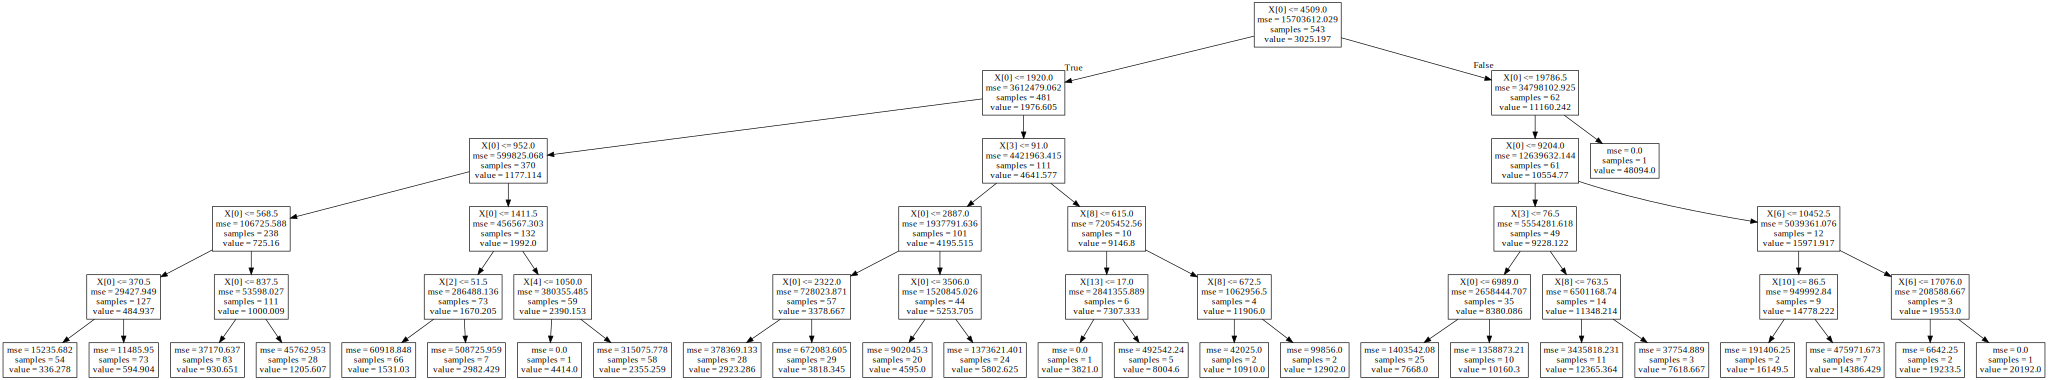

In [35]:
export_graphviz(regr_tree_college_best_alpha, out_file = "college_tree_ba.dot")
graphviz.Source(open('college_tree_ba.dot').read())

In [37]:
y_pred = regr_tree_college_best_alpha.predict(X_test) #Calculating this model's MSE
mse2g = mean_squared_error(y_test, y_pred)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 1855396.9991518196


As the value of alpha is approaching the best alpha corresponding with the highest test scores, more of the tree is pruned creating a decision tree that generalizes maximizing the best testing accuracy. 

#### h.	Compare the above test error rates in part (g) with the one obtained using LASSO regression (test MSE) in Part 1(d). 

In [38]:
print('Test Error Rate from part 1D - Lasso Regression MSE:', mse1d)
print('Test Error Rate from Part 2G - Regression Tree MSE:', mse2g)
if mse2g > mse1d:
    print('The Lasso Regression Model has a lower MSE than the Regression Tree Model.')
else:
    print('The Regression Tree Model has a lower MSE than the Lasso Regression Model.')

Test Error Rate from part 1D - Lasso Regression MSE: 1297628.4623670129
Test Error Rate from Part 2G - Regression Tree MSE: 1855396.9991518196
The Lasso Regression Model has a lower MSE than the Regression Tree Model.


#### i.	Which model will you select for this decision problem and why? 

For the decision problem we choose the Lasso Regression Model over the Tree Regression Model as it produces a substantially lower MSE. This is possibly because Lasso is able reduce the complexity of the model by individually looking at each feature and determine whether to shrink the coefficient to improve how accurately the model can predict the true responses.